In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
dataset=pd.read_csv("D:\\project2\\CarPrice_prediction.csv")

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
dataset.shape

(205, 26)

In [6]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
print(dataset.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
dataset['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
dataset['fueltype'] = dataset['fueltype'].map({'gas':0,'diesel':1})

In [12]:
dataset['fueltype'].unique()

array([0, 1], dtype=int64)

In [13]:
dataset['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [14]:
dataset['enginetype']=dataset['enginetype'].map({'dohc':0, 'ohcv':1, 'ohc':2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6})

In [15]:
dataset['enginetype'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [16]:
dataset['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [17]:
dataset['cylindernumber']=dataset['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [18]:
dataset['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [19]:
dataset['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [20]:
dataset['fuelsystem']=dataset['fuelsystem'].map({'mpfi':0, '2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7})

In [21]:
dataset['fuelsystem'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [22]:
X = dataset.drop(['car_ID','aspiration','symboling','CarName','doornumber','carbody','drivewheel','enginelocation','price'],axis=1)
y=dataset['price']

In [23]:
X

,fueltype,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27
1,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27
2,0,94.5,171.2,65.5,52.4,2823,1,6,152,0,2.68,3.47,9.0,154,5000,19,26
3,0,99.8,176.6,66.2,54.3,2337,2,4,109,0,3.19,3.40,10.0,102,5500,24,30
4,0,99.4,176.6,66.4,54.3,2824,2,5,136,0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,109.1,188.8,68.9,55.5,2952,2,4,141,0,3.78,3.15,9.5,114,5400,23,28
201,0,109.1,188.8,68.8,55.5,3049,2,4,141,0,3.78,3.15,8.7,160,5300,19,25
202,0,109.1,188.8,68.9,55.5,3012,1,6,173,0,3.58,2.87,8.8,134,5500,18,23
203,1,109.1,188.8,68.9,55.5,3217,2,6,145,6,3.01,3.40,23.0,106,4800,26,27


In [24]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [27]:
from sklearn import metrics

In [28]:
y_pred1 = lr.predict(X_test)

In [29]:
score1 = metrics.r2_score(y_test,y_pred1)

In [30]:
print("The R2-score using LINEAR REGRESSION IS:",score1)

The R2-score using LINEAR REGRESSION IS: 0.8448511913577373


In [31]:
y_pred1

array([28082.89565089, 17839.06729356, 10771.19060222, 13883.48876243,
       25410.81999414,  5859.53527348,  9089.05604242,  6473.09056325,
       12762.42604215,  9710.3667434 , 16431.40198933,  5712.08602724,
       16252.18286516,  8938.29743011, 41476.88017285,  5635.2106143 ,
       -1109.06168731, 14598.812332  , 10318.18686204, 12545.06172276,
       10453.10934639, 21987.50429901,  6051.26688229,   426.52576603,
        6604.25093387, 28161.27304197, 13966.40097777, 16911.04392313,
        5667.22101403, 16664.25681896, 24979.28059283,  6593.53581161,
        6269.09554098, 22976.59061796,  7239.10580358, 24660.3980348 ,
       12122.5604416 , 10157.91852298,  5160.42517459, 14596.2340087 ,
       10120.40536555])

In [32]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
Name: price, dtype: float64

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
y_pred2 = rf.predict(X_test)

In [35]:
score2 = metrics.r2_score(y_test,y_pred2)

In [36]:
print("The R2-score using RANDOM FOREST REGRESSOR IS:", score2)

The R2-score using RANDOM FOREST REGRESSOR IS: 0.9580994295540967


In [37]:
model_comparision = pd.DataFrame({'models':['LR','RF'],
             "SCORES":[score1,score2]})

In [38]:
model_comparision

,models,SCORES
0,LR,0.844851
1,RF,0.958099


C:\Users\Srija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='models', ylabel='SCORES'>

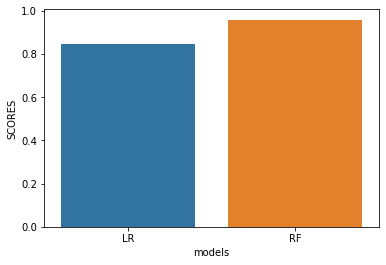

In [39]:
import seaborn as sns
sns.barplot(model_comparision['models'],model_comparision['SCORES'])